# Classification mini project

In [1]:
#################################################################
# The problem consists in deciding whether a flower is a rose   # 
# or a sunflower. To do that, I select a dataset with 400 roses #
# and 400 sunflowers and run both LogisticRegression and KNN    #
# on the dataset. Then perform Principal Component Analysis to  #
# reduce the dimension and run LogisticRegression and KNN again.#
#################################################################

images are not the same size


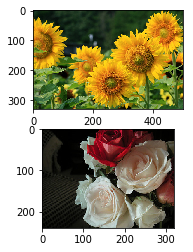

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

im1 =imageio.imread('flowers-recognition/sunflower/1008566138_6927679c8a.jpg')
im2=imageio.imread('flowers-recognition/rose/102501987_3cdb8e5394_n.jpg')
image1=np.array(im1)
image2=np.array(im2)
ax1=plt.subplot(2,1,1)
ax1.imshow(image1)
ax2=plt.subplot(2,1,2)
ax2.imshow(image2)
print('images are not the same size')

In [3]:
from skimage import transform
image_resized=transform.resize(image1,(100,100),anti_aliasing=True,mode='reflect')
image_resized[0][:10]
#plt.imshow(image)

array([[0.11647059, 0.18764706, 0.1445098 ],
       [0.11254902, 0.19215686, 0.14392157],
       [0.10921569, 0.19490196, 0.14392157],
       [0.09686275, 0.17921569, 0.13156863],
       [0.07058824, 0.16019608, 0.08960784],
       [0.06666667, 0.16411765, 0.0745098 ],
       [0.0745098 , 0.17588235, 0.06666667],
       [0.07509804, 0.18039216, 0.07058824],
       [0.07843137, 0.19490196, 0.0745098 ],
       [0.08176471, 0.1954902 , 0.07843137]])

In [4]:
SHAPE=(100,100,3)
# image.shape=(rows,columns,3)
def image_to_array(image):
    ima=image.reshape((image.shape[0]*image.shape[1]*image.shape[2]))
    return ima
#image_array.shape=(rows*columns*3)
def array_to_image(image_array):
    size=image_array.shape[0]
    r,b,g=image_array[0:size:3],image_array[1:size:3],image_array[2:size:3]
    array=np.zeros((SHAPE[0],SHAPE[1],3))
    array[..., 0],array[...,1],array[...,2] = r.reshape((SHAPE[0],SHAPE[1])),b.reshape((SHAPE[0],SHAPE[1])), g.reshape((SHAPE[0],SHAPE[1]))
    return array

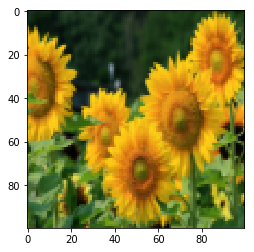

In [5]:
# image resized 100 x 100 x 3
plt.imshow(array_to_image(image_to_array(image_resized)))


In [6]:
import glob
from skimage import transform
flores=['daisy','dandelion','rose','sunflower','tulip']
# get all the flowers from the folder and return a list of numpy array
def get_flores(flor):
    flower_list = []
    for filename in glob.glob('flowers-recognition/'+flor+'/*.jpg'): 
        im =imageio.imread(filename)
        flower_list.append(np.array(im))
    return flower_list

# takes list of arrays of flowers and return a list of array of flowers resized
def flowers_samesize(flower_list):
    samesize_list=[]
    for flower in flower_list:
        im=transform.resize(flower,(100,100),anti_aliasing=False,mode='constant')
        samesize_list.append(im)
    return samesize_list

# takes list of same size flowers and return a list of reshaped arrays of flowers        
def data_flores(lista_flores):
    data=np.zeros((400,30000))
    for i in range(400):
        data[i,:]=image_to_array(lista_flores[i])
    return data
        

In [7]:
# create a DataFrame 
import pandas as pd
rose=pd.DataFrame(data_flores(flowers_samesize(get_flores('rose'))))
sunflower=pd.DataFrame(data_flores(flowers_samesize(get_flores('sunflower'))))

In [8]:
X=rose.append(sunflower,ignore_index=True)
Y=pd.DataFrame(np.zeros(800))
Y.iloc[400:]=np.ones((400,1))

## split the data into train and test sets

In [9]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# splits data into 5 folds and return the score of the model 
def score(X,Y,model):
    kf=KFold(n_splits=5)
    score=0
    for train_index,test_index in kf.split(X):
        y_train,y_test=Y.iloc[train_index],Y.iloc[test_index]
        x_train,x_test=X.iloc[train_index],X.iloc[test_index]
        model.fit(x_train,y_train.values.ravel())
        score+=accuracy_score(model.predict(x_test),y_test)
    return score/5 




## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
def choose_parameter(reg,x_train,y_train):
    score_=0
    best_reg=0
    for r in reg:
        model=LogisticRegression(C=r,solver='liblinear')
        partial_score=score(x_train,y_train,model)
        partial_reg=r
        if partial_score>score_:
            score_=partial_score
            best_reg=partial_reg
    return best_reg

In [12]:
reg=[0.0001,0.01,0.001,0.1]# parameter of regularization
r=choose_parameter(reg,X_train,Y_train)
model=LogisticRegression(C=r,solver='liblinear')
model.fit(X_train,Y_train.values.ravel())
result_train=accuracy_score(model.predict(X_train),Y_train)
result_test=accuracy_score(model.predict(X_test),Y_test)
print('Best Logistic regularization parameter: ',r)
print('LogisticRegression accuracy on train data: %0.2f' %(result_train))
print('LogisticRegression accuracy on test data: %0.2f' %(result_test))

Best Logistic regularization parameter:  0.001
LogisticRegression accuracy on train data: 0.94
LogisticRegression accuracy on test data: 0.88


## Principal Component Analysis

In [13]:
from sklearn.decomposition import PCA
# choose n_components that emxplain more than 90 % of the variance in the features
for n in [20,40,80,160,200,250,270,290,310,330]:
    model_pca=PCA(n_components=n)
    model_pca.fit(X)
    if model_pca.explained_variance_ratio_.sum()>0.9:
        print('n_components used to explain 0.9 % :',n )
        break

n_components used to explain 0.9 % : 310


In [14]:
model_pca.explained_variance_ratio_[0:50]

array([0.22511211, 0.07843421, 0.06030862, 0.03686855, 0.02867626,
       0.02371534, 0.01883848, 0.01676653, 0.0138812 , 0.01313425,
       0.01208361, 0.0113124 , 0.0102809 , 0.00995496, 0.00724654,
       0.00697714, 0.00658099, 0.00640495, 0.00615294, 0.00589881,
       0.00516984, 0.00507804, 0.00493452, 0.00472951, 0.0045453 ,
       0.0041609 , 0.00404771, 0.00398196, 0.00367424, 0.00362127,
       0.00353594, 0.00329321, 0.00322187, 0.00318059, 0.00314059,
       0.00296892, 0.00286851, 0.00279024, 0.00274165, 0.00265612,
       0.00262819, 0.00254275, 0.0025024 , 0.0024301 , 0.00235292,
       0.00230392, 0.00227176, 0.00223909, 0.00221547, 0.00213188])

### PCA and LogisticRegression

In [15]:
# iterate over the n_components and apply LogisticRegression 

D=model_pca.transform(X)
reg=[0.0001,0.001,0.01,0.1]# parameter of regularization
train_test_reg=[]
for i in np.arange(10,260,10):
    D_train,D_test,Y_train,Y_test=train_test_split(D[:,0:i],Y,test_size=0.25,random_state=0)
    r=choose_parameter(reg,pd.DataFrame(D_train),pd.DataFrame(Y_train))
    model=LogisticRegression(C=r)
    model.fit(D_train,Y_train.values.ravel())
    result_train=round(accuracy_score(model.predict(D_train),Y_train),3)
    result_test=accuracy_score(model.predict(D_test),Y_test)
    train_test_reg.append((result_train,result_test,r))
print('list of (train accuracy, test accuracy, reg) for n_components :')


list of (train accuracy, test accuracy, reg) for n_components :


(10, 255)

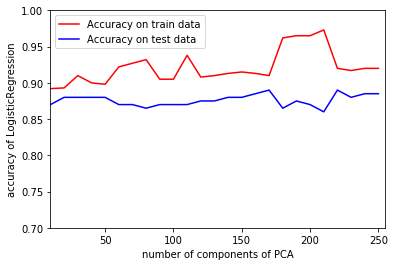

In [16]:
# plot PCA components vs LogisticRegression accuracy
accuracy_train,accuracy_test,reg=zip(*train_test_reg)
plt.plot(np.arange(10,260,10),accuracy_train,'r')
plt.plot(np.arange(10,260,10),accuracy_test,'b')
plt.xlabel('number of components of PCA')
plt.ylabel('accuracy of LogisticRegression')
axes=plt.gca()
axes.legend(['Accuracy on train data','Accuracy on test data'],loc=2)
axes.set_ylim([0.7,1.0])
axes.set_xlim([10,255])

In [17]:
print('best regularization parameter:',reg[np.argmax(accuracy_test)])
print('LRegression accuracy after PCA on train data:',accuracy_train[np.argmax(accuracy_test)])
print('Maximum LRegression accuracy after PCA on test data:',np.max(accuracy_test))

best regularization parameter: 0.001
LRegression accuracy after PCA on train data: 0.91
Maximum LRegression accuracy after PCA on test data: 0.89


## K Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:

# choose the best parameter for KNN
def chooseKNN(neighbors,X,Y):
    best_score=0
    parametro=0
    for k in neighbors:
        kkn=KNeighborsClassifier(n_neighbors=k)
        score_parcial=score(X,Y,kkn)
        if score_parcial>best_score:
            best_score=score_parcial
            parametro=k
    return parametro
        
    

### KNN without PCA

In [20]:
# KNN with all the data to show the dimensionality problem
k=chooseKNN(np.arange(1,11,2),X_train,Y_train)
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,Y_train.values.ravel())
score_test=accuracy_score(knn.predict(X_test),Y_test)
score_train=accuracy_score(knn.predict(X_train),Y_train)
print('KNN accuracy on train data:',score_train)
print('KNN accuracy on test data: ',score_test,'\nKKN n_neighbors: ',k)

KNN accuracy on train data: 0.86
KNN accuracy on test data:  0.78 
KKN n_neighbors:  7


### KNN with PCA

In [21]:
D=model_pca.transform(X)

In [22]:
D_train,D_test,Y_train,Y_test=train_test_split(D[:,0:2],Y,test_size=0.25,random_state=0)
k=chooseKNN(neighbors,pd.DataFrame(D_train),pd.DataFrame(Y_train))
model=KNeighborsClassifier(n_neighbors=k)
model.fit(D_train,Y_train.values.ravel())
print('KNN accuracy on test data with 2 components:',accuracy_score(model.predict(D_test),Y_test))

NameError: name 'neighbors' is not defined

In [ ]:

neighbors=np.arange(1,11,2)# parameter of regularization
result=[]
for i in np.arange(10,260,10):
    D_train,D_test,Y_train,Y_test=train_test_split(D[:,0:i],Y,test_size=0.25,random_state=0)
    k=chooseKNN(neighbors,pd.DataFrame(D_train),pd.DataFrame(Y_train))
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(D_train,Y_train.values.ravel())
    accuracy_train=round(accuracy_score(model.predict(D_train),Y_train),3)
    accuracy_test=accuracy_score(model.predict(D_test),Y_test)
    result.append((accuracy_train,accuracy_test,k))
print(result)    


In [ ]:
accuracy_train,accuracy_test,kneighbors=zip(*result)
plt.plot(np.arange(10,260,10),accuracy_train,'r')
plt.plot(np.arange(10,260,10),accuracy_test,'b')
plt.xlabel('number of components of PCA')
plt.ylabel('accuracy of KKN')
axes=plt.gca()
axes.legend(['Accuracy on train data','Accuracy on test data'],loc=2)
axes.set_ylim([0.7,1])
axes.set_xlim([10,255])        
                                

In [ ]:
print('KNN neighbors: ',kneighbors[np.argmax(accuracy_test)])
print('KNN accuracy on train data after PCA: ',accuracy_train[np.argmax(accuracy_test)])
print('Maximum KNN accuracy on test data after PCA:',np.max(accuracy_test))